In [0]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/AVP")

In [0]:
from sklearn.model_selection import cross_validate,KFold
import pandas as pd
import numpy as np

In [0]:
train=pd.read_csv("train_F3WbcTw.csv")

In [4]:
trainFeat1=pd.read_csv("feat1Train.csv")
trainFeat1.head()

,Unnamed: 0,ADV,AUX,CCONJ,PRON,SPACE,VERB,CC,MD,PRP,RB,VB,VBD,VBP,VBZ,_SP,is_alpha,is_stop,0,1,text,0.1,1.1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,4.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,3.0,4.0,2.0,0.0,1.0,0.0,0.0,76,43,0.229167,0.406944,0.0,-0.052607,0.226875,-0.200703,-0.099857,0.016779,0.040449,0.023641,-0.150244,-0.038089,2.156290,-0.176154,0.062838,0.101902,-0.053066,-0.150377,-0.064586,-0.074984,1.046877,-0.210813,...,0.125273,0.111841,0.003215,0.169426,0.086267,-0.045413,-0.067865,0.026202,0.327922,0.109486,0.052191,-0.111114,-0.087967,-0.124597,-0.144373,0.015068,-0.039077,0.033773,0.010696,0.264734,0.182018,-0.047318,0.047744,-0.111592,-0.049427,-0.094367,0.148708,-0.161833,0.134181,0.021277,-0.185403,0.044829,-0.080806,-0.047319,0.041768,-0.017524,-0.071495,-0.088037,0.083721,0.080059
1,1,6.0,3.0,0.0,7.0,0.0,2.0,0.0,3.0,7.0,6.0,2.0,0.0,0.0,0.0,0.0,209,131,0.287625,0.506667,0.0,-0.047682,0.206839,-0.215404,-0.029141,-0.008281,0.052198,-0.016884,-0.075367,0.008192,2.322640,-0.224296,0.033598,0.100103,-0.000075,-0.107479,-0.068234,-0.096361,1.124990,-0.229473,...,0.116301,0.146036,0.003398,0.068756,0.104319,-0.057257,-0.025853,0.067777,0.462989,0.077244,0.060326,-0.039854,-0.077889,-0.126563,-0.074327,0.021433,-0.006147,0.073703,-0.009756,0.250299,0.153146,0.009448,0.019093,-0.077496,-0.043824,-0.080385,0.132198,-0.096872,0.135089,-0.040560,-0.198424,0.065327,-0.045950,-0.035204,0.038584,-0.017660,-0.042495,-0.024920,0.054476,0.083480
2,2,2.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,1.0,117,63,0.182391,0.607721,0.0,-0.116780,0.259267,-0.169298,-0.044675,-0.006331,-0.041465,-0.042457,-0.078323,0.001200,1.778818,-0.141268,0.056554,0.044799,-0.022341,-0.043804,-0.083520,0.010663,1.164100,-0.218318,...,0.060347,0.121031,-0.022043,0.098540,0.070345,-0.065134,0.058662,0.030755,0.377242,-0.057676,0.074737,0.016668,-0.133566,-0.101253,-0.121851,0.042287,0.017047,0.049881,-0.049186,0.207975,0.115926,0.074723,0.065741,-0.067769,0.002801,0.002777,0.046870,-0.092605,0.163862,0.081651,-0.109733,-0.012333,-0.010741,-0.037890,0.028225,-0.015134,-0.134486,-0.116140,0.017420,0.053108
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,10,0.575000,0.825000,0.0,-0.109729,0.258114,-0.200370,-0.108210,0.056781,-0.004879,0.096955,-0.157096,0.010179,1.825044,-0.093946,0.061597,0.100178,-0.069092,-0.169735,-0.044793,-0.162900,0.962561,-0.199421,...,0.229835,0.033875,0.029865,0.173177,0.051191,0.002581,0.032421,0.075362,0.280270,0.135238,-0.076576,-0.039300,0.006832,-0.087069,-0.111178,0.056014,-0.034346,0.019758,-0.016639,0.181308,0.177319,-0.075074,0.052940,-0.030391,-0.027714,0.021367,0.121303,-0.108219,0.106123,0.008418,-0.135768,0.019375,-0.051473,0.014398,0.131210,0.000879,0.035794,-0.083498,0.080529,0.079877
4,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,109,63,0.228182,0.460455,0.0,-0.038276,0.182850,-0.181513,-0.071236,0.048590,-0.066271,0.053655,-0.157798,0.066704,1.881979,-0.159536,0.061301,0.121933,-0.046437,-0.067832,-0.072904,-0.037248,1.150101,-0.159905,...,0.078389,0.082810,0.005221,0.091749,0.087407,0.001271,0.024630,0.056181,0.339354,0.023184,0.088213,-0.028112,-0.120087,-0.148675,-0.115278,0.027011,-0.046825,0.039864,-0.003018,0.213952,0.192391,0.014331,-0.061372,-0.094258,-0.046196,-0.022859,0.093569,-0.042124,0.157945,0.018463,-0.084673,0.000244,0.016896,-0.118390,0.064469,0.009064,-0.031358,0.003212,-0.008422,0.080723


In [5]:
trainFeat2=pd.read_csv("feat2Train.csv")
trainFeat2.head()

,svd0,svd1,svd2,svd3,svd4
0,0.257643,-0.144480,-0.032391,0.012759,-0.041631
1,0.429312,-0.074353,-0.093517,0.088265,-0.052818
2,0.228044,0.055064,-0.031327,-0.019708,0.039651
3,0.081790,-0.029187,-0.039378,0.004665,-0.037870
4,0.305319,-0.005485,0.010990,-0.106847,-0.012087


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [0]:
KFold??

In [0]:
def helper_cross_validate(X,y,model,train_model=train_model,pass_val=False):
  kf=KFold(n_splits=10)
  score_list=[]
  for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    if pass_val:
      model=train_model(model,X_train,y_train,X_test,y_test)
    else:
      model=train_model(model,X_train,y_train)
    pred=model.predict(X_test)
    score=evaluate(y_test,pred)
    print(score)
    score_list.append(score)
    #pd.Series(rf.feature_importances_).plot()
    #plt.show()  
    #ploting
  #plt.figure(figsize=(20,15))
  plt.bar(range(10),score_list)
  plt.show()
  
  
  #feature Importtance
  

In [0]:
rf=RandomForestClassifier(n_estimators=100) 

In [0]:
train_model=lambda m,x,y:m.fit(x,y)

In [0]:
def evaluate(y_test,pred):
  return f1_score(y_test, pred, average='macro')

In [15]:
helper_cross_validate(trainFeat1,train.loc[:,"sentiment"],rf)

KeyboardInterrupt: ignored

0.3432048805522974


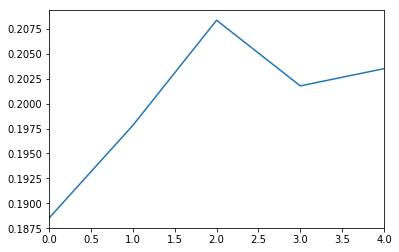

0.3629410873266628


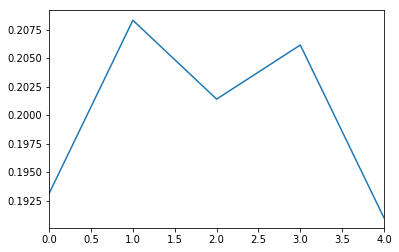

0.3501249962350532


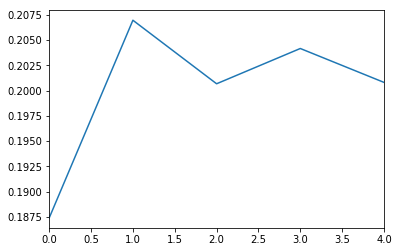

0.3389562066456914


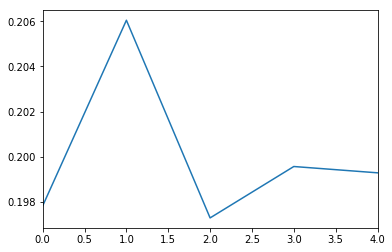

0.3474274912871404


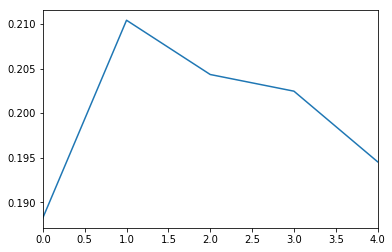

0.3583788900386346


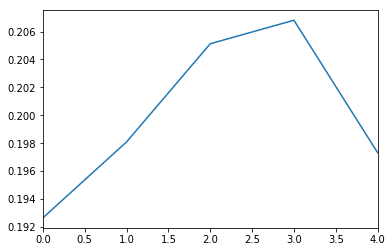

0.3529885266382739


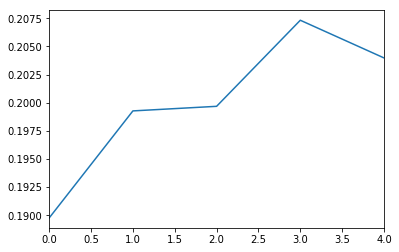

0.37251091473534004


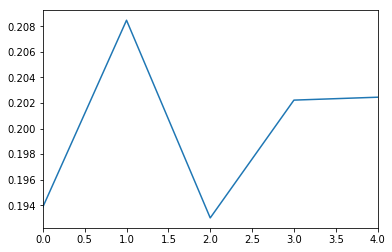

0.3971221797078699


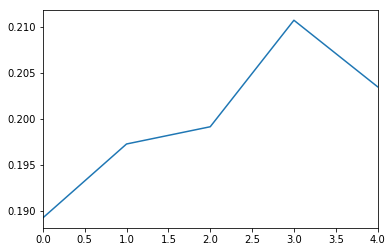

0.36979651786757645


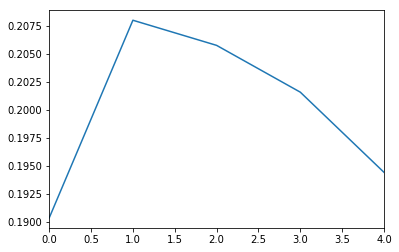

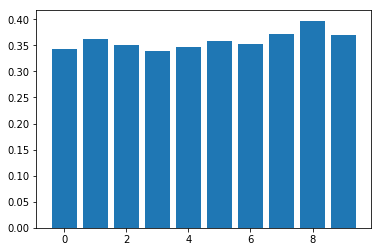

In [0]:
helper_cross_validate(trainFeat2,train.loc[:,"sentiment"],rf)

0.36804714733824784


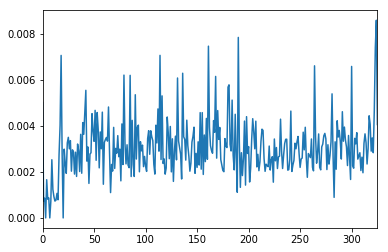

0.37797809316796654


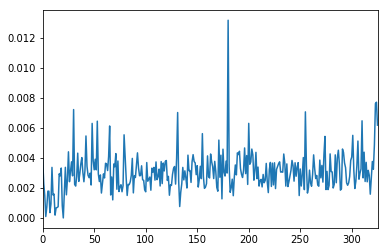

0.35931753431753427


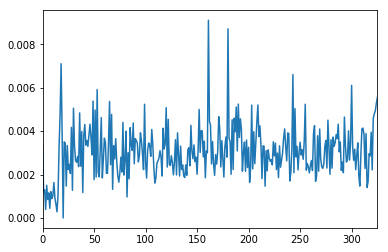

0.4106757172089394


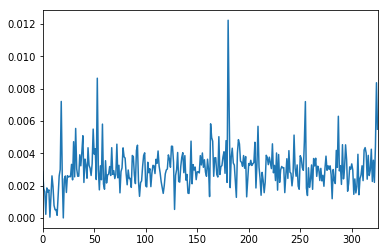

0.3751689835805802


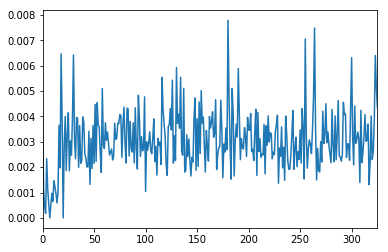

0.38673705919449136


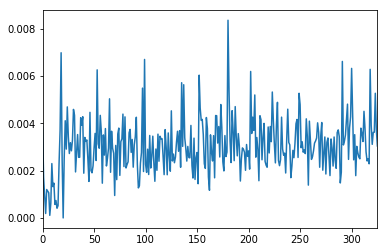

0.35381102126385144


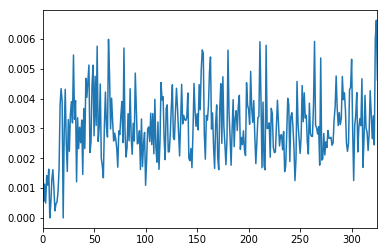

0.3682250015620074


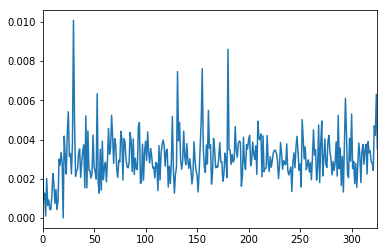

0.35370314619524074


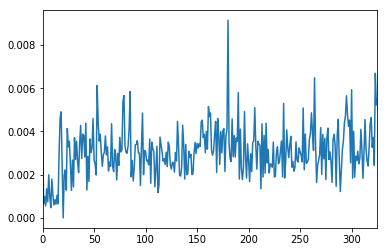

0.34745348609479043


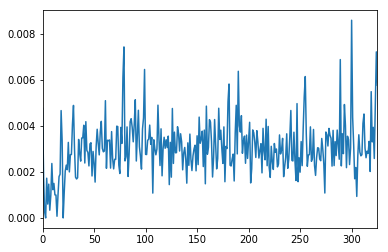

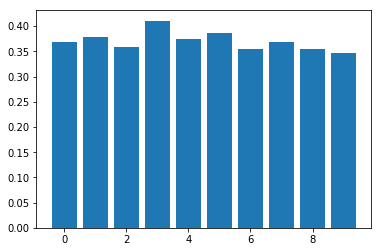

In [0]:
helper_cross_validate(pd.concat([trainFeat1,trainFeat2],axis=1),train.loc[:,"sentiment"],rf)

In [28]:
!pip install --user --upgrade catboost
!pip install --user --upgrade ipywidgets
!pip install shap
!pip install sklearn
!pip install --upgrade numpy
!jupyter nbextension enable --py widgetsnbextension

Requirement already up-to-date: catboost in /root/.local/lib/python3.6/site-packages (0.16)
Requirement already up-to-date: ipywidgets in /usr/local/lib/python3.6/dist-packages (7.5.0)
     |████████████████████████████████| 20.4MB 3.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [0]:
import catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.01,
        task_type = "GPU",
        loss_function='MultiClass',
        custom_metric='F1'
    )
def catboost_train_model(model,X_train,y_train,X_test,y_test):
    model.fit(
        X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_test, y_test),
        verbose=True
    )
    return model


(# Doc2Vec  Try

In [0]:
from sklearn.base import BaseEstimator,TransformerMixin
import glob
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
class ParagraphVectors(BaseEstimator,TransformerMixin):
    """
    sklearn style transformer for DOC2vec as paragraphVectors
    """
    
    
    def __init__ (self,max_epochs=100,
                  vec_size=100,
                  alpha=0.025,
                  dm=1,
                  filename='user_story',
                  **doc2vec_args):
        try :
            from gensim.models.doc2vec import Doc2Vec, TaggedDocument
            from nltk.tokenize import word_tokenize
        except ImportError:
            print("gensim or nltk was not installed")

        self.max_epochs=max_epochs
        self.vec_size=vec_size
        self.alpha=alpha
        self.dm=dm
        self.filename=filename
        self.DIRECTORY_PATH=r'tmp\\'

        
    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_tagged_data(self,text_series):


        data=text_series.tolist()
        tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
        return tagged_data
       
    def fit(self,text_series,**doc2vec_args):
        
        """
        Distribuited memory vectors
        """
        
        if not glob.glob(self.DIRECTORY_PATH+self.filename+'*.model'):
            
        
            tagged_data=self.get_tagged_data(text_series)
            model = Doc2Vec(size=self.vec_size,
                            alpha=self.alpha, 
                            min_alpha=0.025,
                            min_count=1,
                            dm =self.dm,
                            **doc2vec_args)
              
            model.build_vocab(tagged_data)
        else:
            
            tagged_data=self.get_tagged_data(text_series)

            model= Doc2Vec.load("{}{}_d2v.model".format(self.DIRECTORY_PATH,self.filename))

            
        for epoch in range(self.max_epochs):
            print('iteration {0}'.format(epoch))
            model.train(tagged_data,
                        total_examples=model.corpus_count,
                        epochs=model.iter)
            # decrease the learning rate
            model.alpha -= 0.0002
            # fix the learning rate, no decay
            model.min_alpha = model.alpha
        
        model.save("{}{}_d2v.model".format(self.DIRECTORY_PATH,self.filename))
        print("Model Saved to {}{}".format(self.DIRECTORY_PATH,self.filename))
        
   
    
    def transform(self,test_sent_list):
       
        if isinstance(test_sent_list,pd.core.series.Series):
            test_sent_list=test_sent_list.tolist()

            
        if not (isinstance(test_sent_list,list) or isinstance(test_sent_list,np.ndarray)):            
            test_sent_list=[test_sent_list]
        
        
        model= Doc2Vec.load("{}{}_d2v.model".format(self.DIRECTORY_PATH,self.filename))
        pred=[]
        for sent in test_sent_list:
            pred.append(model.infer_vector(sent))
        return np.vstack([pred])


In [0]:
pv=ParagraphVectors(20)

In [0]:
paraVect=pv.fit_transform(train.loc[:,"text"])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved to tmp\\user_story


0.2772861356932153


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


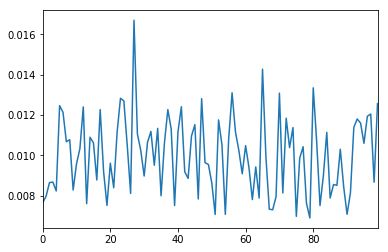

0.28112449799196787


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


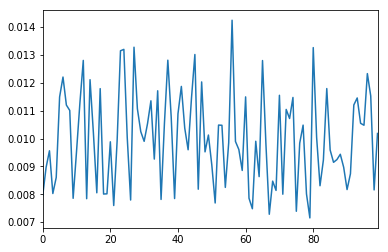

0.28776462145676357


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


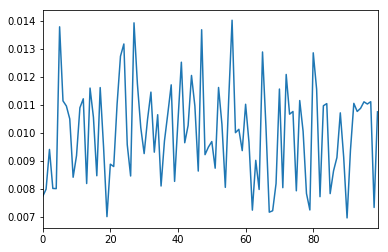

0.2836416394631846


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


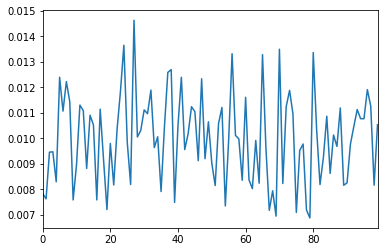

0.2828062522719011


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


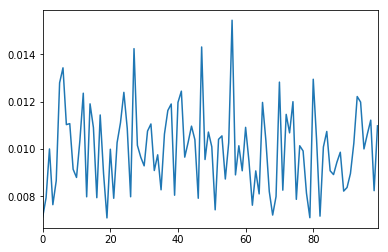

0.27380952380952384


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


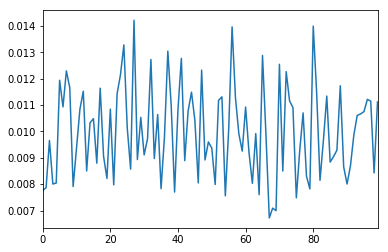

0.27814569536423844


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


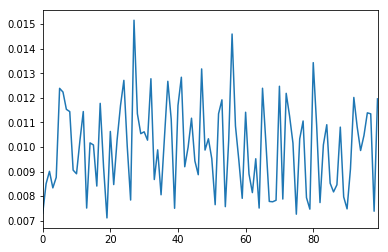

0.27728613569321536


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


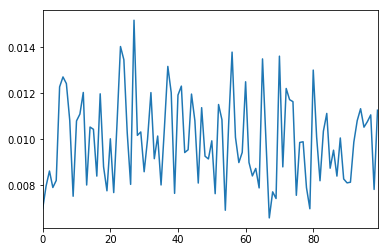

0.2790014684287812


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


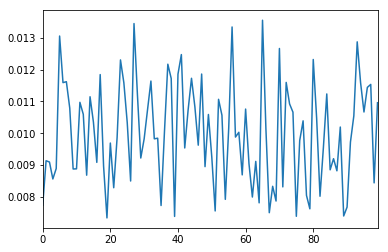

0.2791896869244936


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


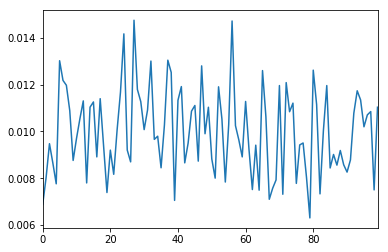

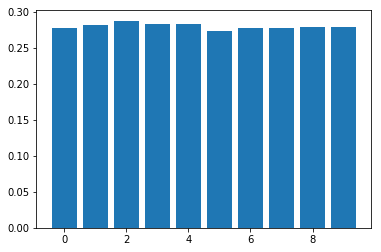

In [0]:
helper_cross_validate(pd.DataFrame(paraVect),train.loc[:,"sentiment"],rf)

# just TFIDF TRY

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf=TfidfVectorizer()
tfidf_vec=tfidf.fit_transform(train.loc[:,"text"])

In [17]:
tfidf_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

0.3033389890330454


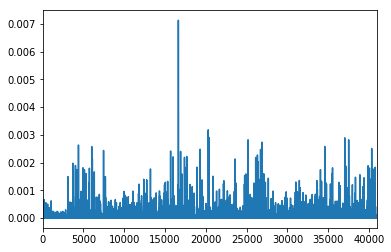

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.291094584286804


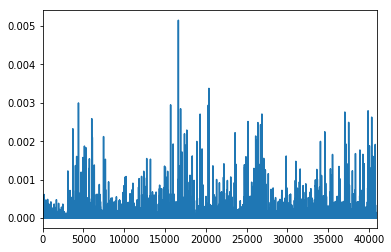

0.3034405834405834


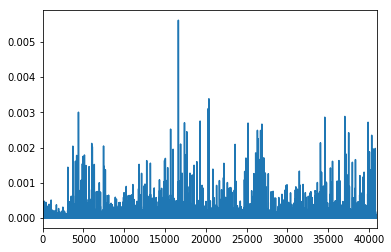

0.31865107828495465


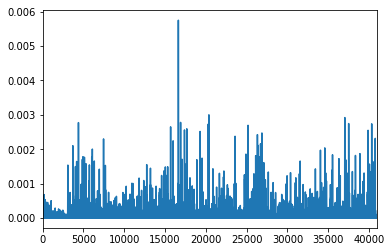

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2828062522719011


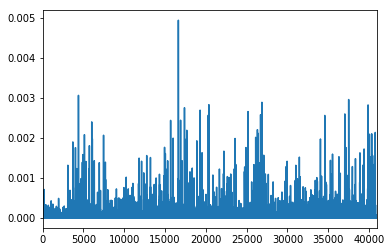

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.28523779238216385


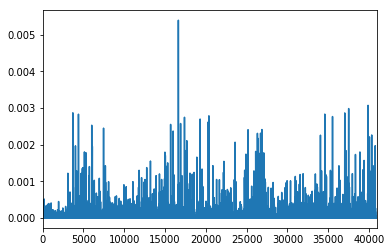

0.2934979423868313


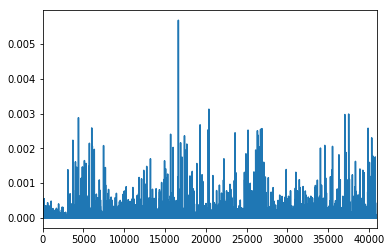

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2863651376503274


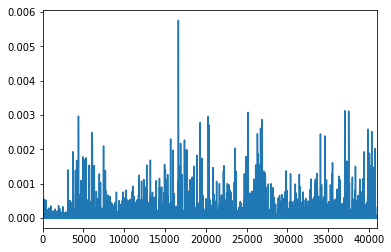

KeyboardInterrupt: ignored

In [41]:
helper_cross_validate(pd.DataFrame(tfidf_vec.toarray()),train.loc[:,"sentiment"],rf)

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
gnb=GaussianNB()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.27771639042357277


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.28112449799196787


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2881720430107527


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2836416394631846


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2828062522719011


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.27380952380952384


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.27814569536423844


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.27728613569321536


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2790014684287812
0.27888153053715964


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


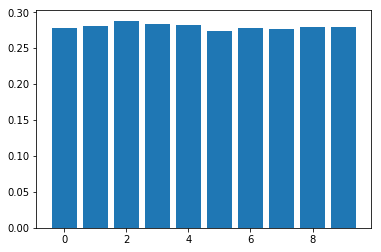

In [32]:
helper_cross_validate(pd.DataFrame(tfidf.transform(train['text']).toarray()),train.loc[:,"sentiment"],gnb)

0.29803210991041224


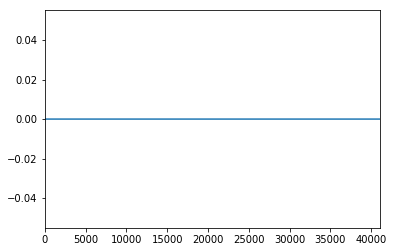

0.266962558324798


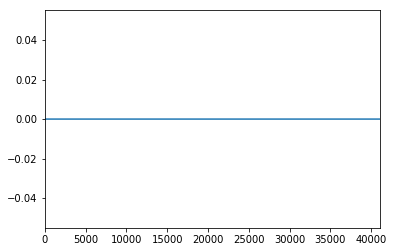

0.23806341764469643


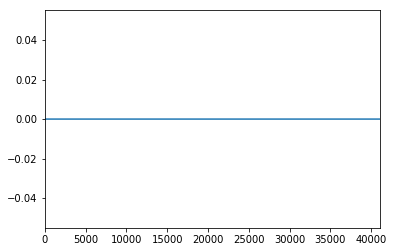

0.29662537721563115


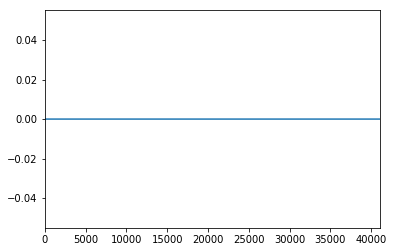

0.27163457582726097


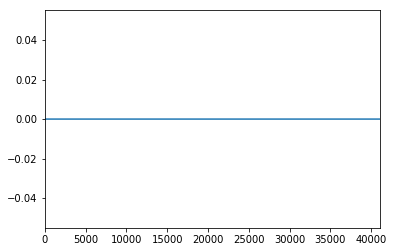

0.2752424151106832


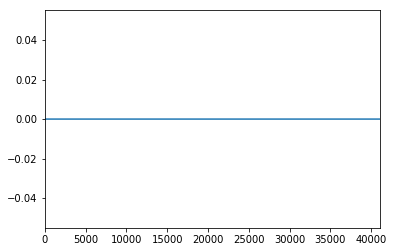

0.2915912367245002


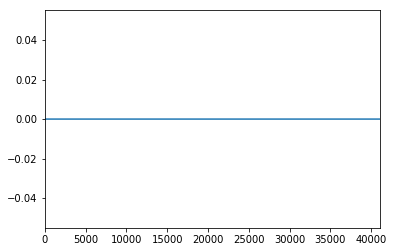

0.30994315252186316


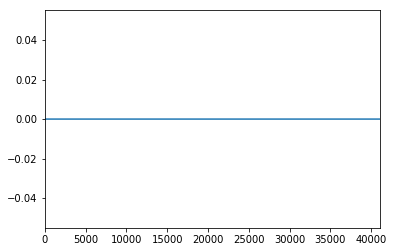

0.293278853634294


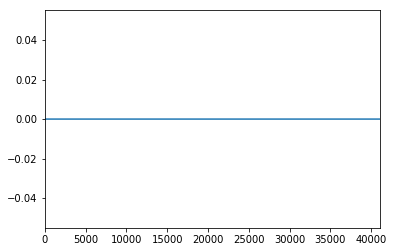

0.26180153390779576


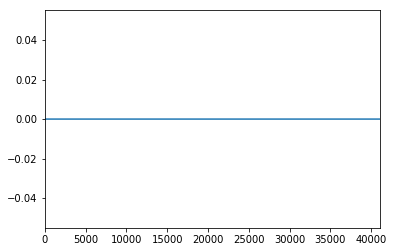

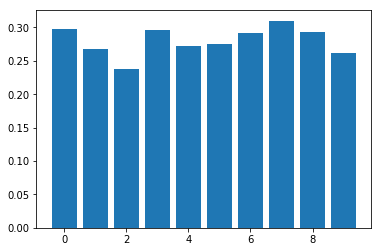

In [45]:
helper_cross_validate(pd.DataFrame(paraVect),train.loc[:,"sentiment"],gnb)

0.2598568618700517
0.21429693083955811
0.2223880250071195
0.28247029597502743
0.22333616392336517
0.25036007023195433
0.27880236052586843
0.25358327165199207
0.26041068054490873
0.24632594215938686


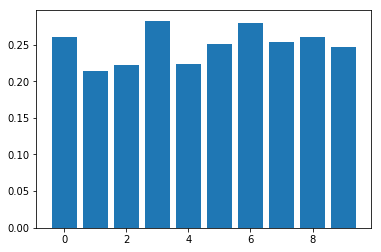

In [22]:
helper_cross_validate(pd.concat([trainFeat1,pd.DataFrame(tfidf_vec.toarray())],axis=1),train.loc[:,"sentiment"],gnb)

In [0]:
test=pd.read_csv("test.csv")

In [15]:
full=pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
tfidf=TfidfVectorizer()

In [17]:
full_vec=tfidf.fit_transform(full['text'])
full_vec.shape

(8203, 47960)

In [21]:
tfidf_vec.shape

NameError: ignored

In [0]:
test_vec=tfidf.transform(test['text'])

In [27]:
gnb=MultinomialNB()
gnb.fit(tfidf.transform(train['text']).toarray(),train['sentiment'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
pred=gnb.predict(test_vec.toarray())

In [0]:
pd.DataFrame(pred,columns=['sentiment'],index=test['unique_hash']).to_csv("tfidf_submission1.csv")

In [39]:
cat_features=[]
helper_cross_validate(pd.DataFrame(tfidf.transform(train['text']).toarray()),train['sentiment'],model,train_model=catboost_train_model,pass_val=True)

0:	learn: 1.0912973	test: 1.0915575	best: 1.0915575 (0)	total: 173ms	remaining: 1m 26s
1:	learn: 1.0841306	test: 1.0848125	best: 1.0848125 (1)	total: 265ms	remaining: 1m 5s
2:	learn: 1.0771479	test: 1.0782286	best: 1.0782286 (2)	total: 332ms	remaining: 55s
3:	learn: 1.0702516	test: 1.0717734	best: 1.0717734 (3)	total: 396ms	remaining: 49.1s
4:	learn: 1.0636107	test: 1.0655270	best: 1.0655270 (4)	total: 463ms	remaining: 45.8s
5:	learn: 1.0570884	test: 1.0595651	best: 1.0595651 (5)	total: 526ms	remaining: 43.3s
6:	learn: 1.0507004	test: 1.0535699	best: 1.0535699 (6)	total: 601ms	remaining: 42.3s
7:	learn: 1.0446033	test: 1.0477887	best: 1.0477887 (7)	total: 651ms	remaining: 40s
8:	learn: 1.0385514	test: 1.0420716	best: 1.0420716 (8)	total: 710ms	remaining: 38.7s
9:	learn: 1.0326805	test: 1.0365501	best: 1.0365501 (9)	total: 774ms	remaining: 37.9s
10:	learn: 1.0269619	test: 1.0311945	best: 1.0311945 (10)	total: 838ms	remaining: 37.3s
11:	learn: 1.0213837	test: 1.0259257	best: 1.0259257 (1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.28577553680455514
0:	learn: 1.0913364	test: 1.0914066	best: 1.0914066 (0)	total: 163ms	remaining: 1m 21s
1:	learn: 1.0844729	test: 1.0846177	best: 1.0846177 (1)	total: 255ms	remaining: 1m 3s
2:	learn: 1.0775136	test: 1.0778714	best: 1.0778714 (2)	total: 349ms	remaining: 57.8s
3:	learn: 1.0708389	test: 1.0714042	best: 1.0714042 (3)	total: 436ms	remaining: 54.1s
4:	learn: 1.0642225	test: 1.0650850	best: 1.0650850 (4)	total: 501ms	remaining: 49.6s
5:	learn: 1.0577917	test: 1.0587609	best: 1.0587609 (5)	total: 554ms	remaining: 45.6s
6:	learn: 1.0514762	test: 1.0525307	best: 1.0525307 (6)	total: 622ms	remaining: 43.8s
7:	learn: 1.0454208	test: 1.0465976	best: 1.0465976 (7)	total: 672ms	remaining: 41.3s
8:	learn: 1.0394302	test: 1.0407793	best: 1.0407793 (8)	total: 733ms	remaining: 40s
9:	learn: 1.0335506	test: 1.0350240	best: 1.0350240 (9)	total: 798ms	remaining: 39.1s
10:	learn: 1.0278947	test: 1.0294871	best: 1.0294871 (10)	total: 864ms	remaining: 38.4s
11:	learn: 1.0223620	test: 1.0240

SystemError: ignored

In [0]:
a=np.random.choice([0,1,2],test.shape[0],[0.4,0.1,0.6])

In [0]:
pd.DataFrame(a,columns=['sentiment'],index=test['unique_hash']).to_csv("tfidf_submission_random.csv")

In [44]:
[2]*test.shape[0]

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
